In [1]:
import socket

In [2]:
socket.gethostname()

'salish.eos.ubc.ca'

In [3]:
import pandas as pd
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import re
import dateutil as dutil
from salishsea_tools import viz_tools, places, geo_tools, evaltools as et
import glob
import pickle
import matplotlib.dates as mdates
import matplotlib as mpl
import pytz
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 

mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.numpoints'] = 1
%matplotlib inline

In [4]:
flist=['search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv',
       'search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20161019T064056Z_20161115T220747Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170426T173216Z_20170522T011843Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170522T011844Z_20170611T234016Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170611T234017Z_20170702T172228Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170722T182607Z_20170815T213737Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170815T213738Z_20170825T225506Z-clean.csv',
       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170825T225507Z_20170923T032427Z-clean.csv',
       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170923T032428Z_20171016T213134Z-clean.csv',
       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20171016T213135Z_20180108T160335Z-clean.csv']
slist=[78,78,78,78,67,67,67,67,67,67,67,67,60,60,60]
dfs=list()
for ii in range(0,len(flist)):
    print(flist[ii])
    dfs.append(pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/'+flist[ii],
        skiprows=slist[ii],header=None,usecols=[0,1,2,3,4,5,6,7,8,9,10],
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'),na_values=' NaN'))

df=pd.concat(dfs,ignore_index=True)
df.drop(df[df.ChlQC != 1].index, inplace=True)
df.reset_index(inplace=True)
dts=[dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]
df=df.assign(dtUTC=dts)
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
print('totlen=',len(df))

search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv
search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20161019T064056Z_20161115T220747Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv
search4979680/BritishColumb

newlen= 11369893


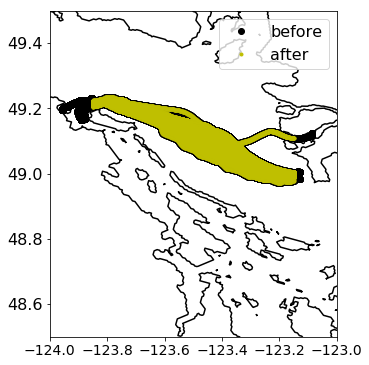

In [5]:
# chop off ends:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
#ax.plot(df['Lon'],df['Lat'], 'ro',label='data')
ax.plot(df['Lon'],df['Lat'], 'ko',label='before')
df.drop(df.loc[(df.Lon<-123.85)|(df.Lon>-123.15)].index,inplace=True)
ax.plot(df['Lon'],df['Lat'],'y.',label='after')
#ax.plot(df2.loc[60,['Lon']],df2.loc[60,['Lat']],'m.')
with nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48.5, 49.5)
ax.legend()
ax.set_xlim(-124., -123);

print('newlen=',len(df))

In [6]:
df.tail()

,index,TimeUTC,CDOM,CDOMQC,Chlorophyll_ug,ChlQC,Turbidity_NTU,TurbQC,Lat,LatQC,Lon,LongQC,dtUTC
13443887,13646072,2018-01-08T16:03:31.403Z,8.004,1,0.5978,1,19.240,1,49.217035,8,-123.806775,8,2018-01-08 16:03:31
13443888,13646073,2018-01-08T16:03:32.475Z,8.280,1,0.5856,1,19.906,1,49.217035,8,-123.806633,8,2018-01-08 16:03:32
13443889,13646074,2018-01-08T16:03:33.549Z,8.464,1,0.6222,1,19.462,1,49.217034,8,-123.806492,8,2018-01-08 16:03:33
13443890,13646075,2018-01-08T16:03:34.622Z,8.372,1,0.6100,1,20.202,1,49.217033,8,-123.806350,8,2018-01-08 16:03:34
13443891,13646076,2018-01-08T16:03:35.694Z,8.096,1,0.5734,1,20.276,1,49.217032,8,-123.806209,8,2018-01-08 16:03:35


In [7]:
def _adelta(x):
    return x.max() - x.min()

_adelta.__name__='delta'

def _crename(xx,cdict):
    return [cdict[x] if x in cdict.keys() else x for x in xx ]

def subsampleFerry(df0,interval,window,nmin,targetVar):
    df0['ts']=(df0['dtUTC']-dt.datetime(1900,1,1)).dt.total_seconds()
    df0.drop(df0[df0.ts%interval+window/2 > window].index, inplace=True)
    df0['tind']=[dt.datetime(1900,1,1)+dt.timedelta(seconds=np.round(aa/interval)*interval) for aa in df0['ts']]
    agg={targetVar:['mean','std','count'],
         'Lat':['mean',_adelta],
         'Lon':['mean',_adelta]}
    df2=df0.groupby(['tind'],as_index=False).agg(agg)
    ndict={'tind':'dtUTC','Chlorophyll_ug_mean':'Chl','Lat_mean':'Lat','Lon_mean':'Lon'}
    df2.columns = _crename(['_'.join(tup).rstrip('_') for tup in df2.columns.values],ndict)
    df2.drop(df2[df2.Chlorophyll_ug_count<nmin].index, inplace=True)
    df2.reset_index(inplace=True)
    return df2

In [8]:
interval=10*60
window=60
nmin=3
targetVar='Chlorophyll_ug'
t0=dt.datetime.now()
df2=subsampleFerry(df,interval,window,nmin,targetVar)
print((dt.datetime.now()-t0))
len(df2)

0:00:54.582348


61254

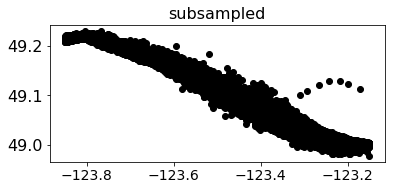

In [9]:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
#ax.plot(df['Lon'],df['Lat'], 'ro',label='data')
ax.plot(df2['Lon'],df2['Lat'], 'ko')
ax.set_title('subsampled')

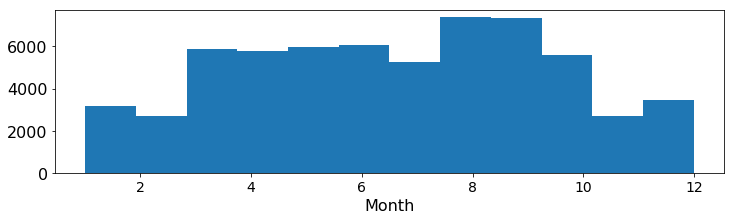

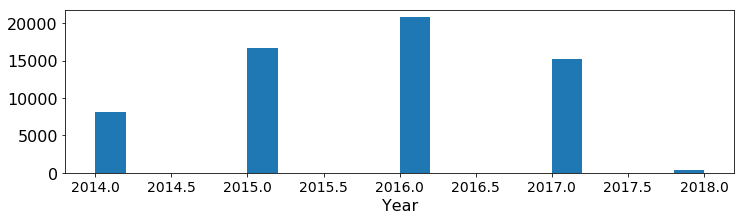

In [10]:
fig,ax=plt.subplots(figsize=(12,3))
ax.hist([xx.month for xx in df2['dtUTC']],12)
ax.set_xlabel('Month')
fig,ax=plt.subplots(figsize=(12,3))
ax.hist([xx.year for xx in df2['dtUTC']],20)
ax.set_xlabel('Year')

In [11]:
df2.tail()

,index,dtUTC,Chl,Chlorophyll_ug_std,Chlorophyll_ug_count,Lat,Lat_delta,Lon,Lon_delta
61249,62063,2018-01-08 14:20:00,0.848952,0.038097,29,49.151370,0.001237,-123.579595,0.003648
61250,62064,2018-01-08 14:30:00,0.652910,0.028541,29,49.175919,0.001203,-123.651933,0.003618
61251,62065,2018-01-08 14:40:00,0.493664,0.014656,28,49.197837,0.000996,-123.725133,0.003584
61252,62066,2018-01-08 14:50:00,0.575503,0.028809,29,49.217438,0.000325,-123.800037,0.004062
61253,62067,2018-01-08 16:00:00,0.554469,0.024743,29,49.213155,0.000755,-123.832206,0.003847


In [12]:
PATH= '/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2018,1,1) #end of current ONC file is <2017 7 3
flen=1
namfmt='nowcast'
filemap={'diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T'}
fdict={'ptrc_T':1,'grid_T':1}

In [13]:
it0=dt.datetime.now()
print(it0)
data=et.matchData(df2,filemap, fdict, start_date, end_date, namfmt, PATH, flen,wrapSearch=True,wrapTol=12,method='ferry')
print(dt.datetime.now()-it0)

2019-02-13 13:36:26.873514
data is matched to mean of upper 3 model levels
2019-02-13 13:37:54.539090
done index ptrc_T 2019-02-13 13:43:07.343383
ptrc_T progress: 0.0%
ptrc_T progress: 10.000380098065301%
ptrc_T progress: 20.000760196130603%
ptrc_T progress: 30.001140294195906%
ptrc_T progress: 40.001520392261206%
ptrc_T progress: 50.0019004903265%
ptrc_T progress: 60.00228058839181%
ptrc_T progress: 70.0026606864571%
ptrc_T progress: 80.00304078452241%
ptrc_T progress: 90.0034208825877%
12:27:23.095210


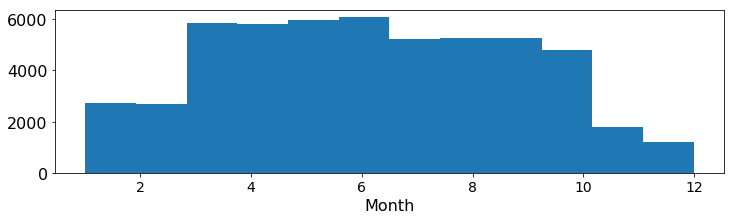

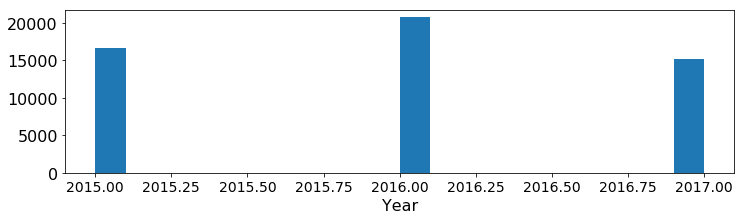

In [14]:
fig,ax=plt.subplots(figsize=(12,3))
ax.hist([xx.month for xx in data['dtUTC']],12)
ax.set_xlabel('Month')
fig,ax=plt.subplots(figsize=(12,3))
ax.hist([xx.year for xx in data['dtUTC']],20)
ax.set_xlabel('Year')

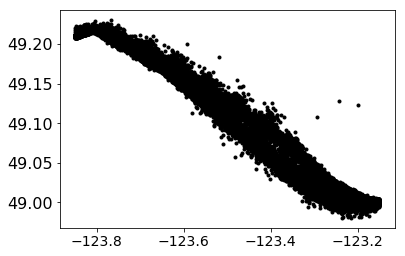

In [15]:
plt.plot(data['Lon'],data['Lat'],'k.')

In [16]:
mod_chl_N=2.0
mod_chl_N=1.6
data['modChl']=mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])
data['l10_obsChl']=np.log10(data['Chl']+0.01)
data['l10_modChl']=np.log10(data['modChl']+0.01)

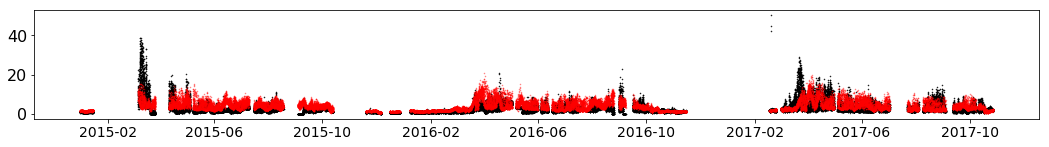

In [17]:
fig,ax=plt.subplots(figsize=(18,2))
ax.plot(data['dtUTC'],data['Chl'],'k.',ms=1)
ax.plot(data['dtUTC'],data['modChl'],'r.',ms=1,alpha=.5)

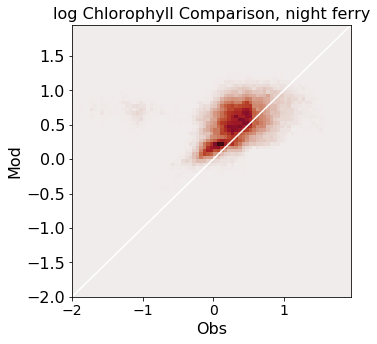

In [18]:
fig,ax=plt.subplots(figsize=(5,5))
ax.hist2d(data['l10_obsChl'],data['l10_modChl'],np.arange(-2,2.0,.05),cmap=cmocean.cm.amp);
ax.set_xlabel('Obs')
ax.set_ylabel('Mod')
ax.plot((-2,2),(-2,2),'w-')
ax.set_title('log Chlorophyll Comparison, night ferry')

In [19]:
def _rmse(delf):
    return np.sqrt(np.mean(np.power(delf,2)))
_rmse.__name__='RMSE'

In [20]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
    e3t_0=np.copy(fm.variables['e3t_0'])
    e3u_0=np.copy(fm.variables['e3u_0'])
    e3v_0=np.copy(fm.variables['e3v_0'])
    e1t=np.copy(fm.variables['e1t'])
    e2t=np.copy(fm.variables['e2t'])
    e1v=np.copy(fm.variables['e1v'])
    e2u=np.copy(fm.variables['e2u'])
    A=fm.variables['e1t'][0,:,:]*fm.variables['e2t'][0,:,:]*tmask[0,0,:,:]
    lmask=-1*(tmask[0,0,:,:]-1)

In [21]:
data['ER']=data['l10_modChl']-data['l10_obsChl']
agg={'ER':[_rmse,'mean'],
     'Chl':'count'}
df3=data.groupby(['i','j'],as_index=False).agg(agg)
df3.columns = ['_'.join(tup).rstrip('_') for tup in df3.columns.values]
df3=df3.reindex()

In [22]:
df3

,i,j,ER_RMSE,ER_mean,Chl_count
0,225,486,0.258920,0.019973,24
1,225,487,0.294754,0.012052,28
2,226,486,0.396912,0.167357,150
3,226,487,0.366569,0.129857,313
4,226,488,0.311939,-0.030052,8
5,227,486,0.339270,0.124484,345
6,227,487,0.338277,0.130103,263
7,227,488,0.526815,0.320064,11
8,227,489,0.275027,-0.054427,3
9,228,485,0.143140,0.143140,1


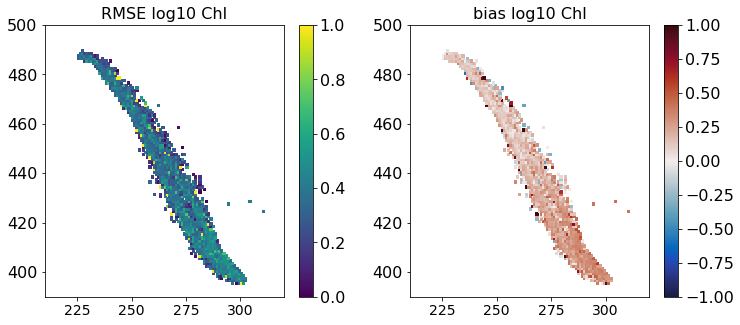

In [23]:
blank=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
blank2=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
for ind, r in df3.iterrows():
    blank[int(r['j']),int(r['i'])]=r['ER_RMSE']
    blank2[int(r['j']),int(r['i'])]=r['ER_mean']
fig,ax=plt.subplots(1,2,figsize=(12,5))
iax=ax[0]
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank),vmin=0,vmax=1.)
iax.set_xlim(210,320)
iax.set_ylim(390,500)
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('RMSE log10 Chl')
iax=ax[1]
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank2),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
iax.set_xlim(210,320)
iax.set_ylim(390,500)
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('bias log10 Chl')

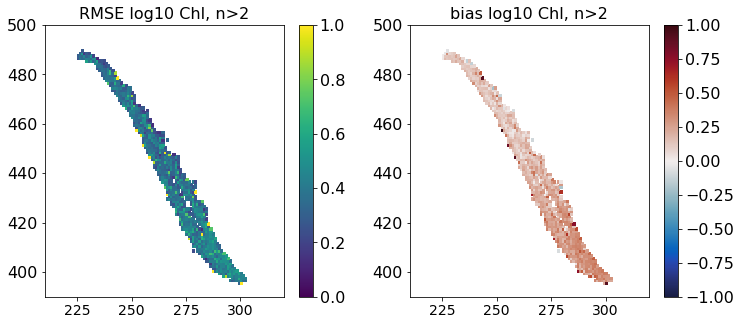

In [24]:
blank=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
blank2=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
for ind, r in df3.iterrows():
    if r['Chl_count']>=3:
        blank[int(r['j']),int(r['i'])]=r['ER_RMSE']
        blank2[int(r['j']),int(r['i'])]=r['ER_mean']
fig,ax=plt.subplots(1,2,figsize=(12,5))
iax=ax[0]
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank),vmin=0,vmax=1.)
iax.set_xlim(210,320)
iax.set_ylim(390,500)
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('RMSE log10 Chl, n>2')
iax=ax[1]
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank2),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
iax.set_xlim(210,320)
iax.set_ylim(390,500)
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('bias log10 Chl, n>2')

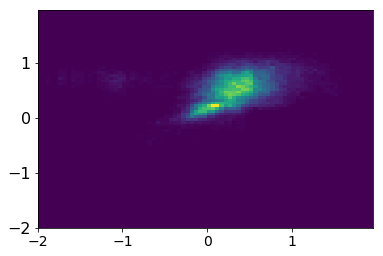

In [25]:
Ns,ex,ey=np.histogram2d(data['l10_obsChl'],data['l10_modChl'],np.arange(-2,2.0,.05));
plt.pcolormesh(ex,ey,Ns.T)